<a href="https://colab.research.google.com/github/wafa17/Machine_Learning/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from copy import deepcopy
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import random as rd


In [0]:
from google.colab import files
uploaded = files.upload()

Saving 1301174151-klustering.csv to 1301174151-klustering.csv


In [0]:
df = pd.read_csv('1301174151-klustering.csv')
df.shape #menampilkan dimensi data klustering

(18278, 9)

In [0]:
df.head() #menampilkan informasi data keseluruhan

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,real_face
0,32,170,72,94,94,5,4,4,1
1,34,187,83,93,93,5,4,5,1
2,27,175,68,92,92,5,5,5,1
3,26,188,87,91,93,3,3,1,1
4,28,175,74,91,91,4,4,4,1


In [0]:
df.describe() #menampilkan informasi data berupa count, mean, max, min, dll

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,real_face
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,1.103184,2.944250,2.368038,0.107670
std,4.656964,6.756961,7.047744,6.949953,6.139669,0.378861,0.664656,0.765038,0.309972
min,16.000000,156.000000,50.000000,48.000000,49.000000,1.000000,1.000000,1.000000,0.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,1.000000,3.000000,2.000000,0.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,1.000000,3.000000,2.000000,0.000000
75%,29.000000,186.000000,80.000000,71.000000,75.000000,1.000000,3.000000,3.000000,0.000000
max,42.000000,205.000000,110.000000,94.000000,95.000000,5.000000,5.000000,5.000000,1.000000


In [0]:
df.isnull().sum() #menhgitung jumlah data missing value

age                         0
height_cm                   0
weight_kg                   0
overall                     0
potential                   0
international_reputation    0
weak_foot                   0
skill_moves                 0
real_face                   0
dtype: int64

Mengambil fitur height dan weight untuk melakukan kustering

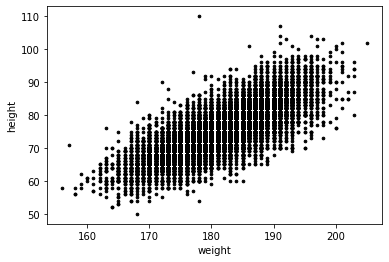

In [0]:
X= df[["height_cm","weight_kg"]] 
#visualisasi data
plt.scatter(X["height_cm"],X["weight_kg"],c='black', s = 7)
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [0]:
# standardizing  data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler digunakan untuk scalling data karena adanya perbedaan rentang data. 
data_scaled = scaler.fit_transform(X)
pd.DataFrame(data_scaled).describe()

,0,1
count,1.827800e+04,1.827800e+04
mean,2.029717e-15,-1.460212e-16
std,1.000027e+00,1.000027e+00
min,-3.753592e+00,-3.586543e+00
25%,-6.456014e-01,-7.486776e-01
50%,-5.360308e-02,-3.921123e-02
75%,6.863948e-01,6.702551e-01
max,3.498387e+00,4.927053e+00


**MENENTUKAN JUMLAH KLUSTER OPTIMAL**


---
Metode yang digunakan untuk menentukan jumlah kluster optimal yaitu elbow method


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Inertia menghitung jumlah jarak semua titik dalam sebuah cluster dari centroid culster tsb.

In [0]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [0]:
# inertia pada data
kmeans.inertia_

9960.777732949755

Text(0, 0.5, 'Inertia')

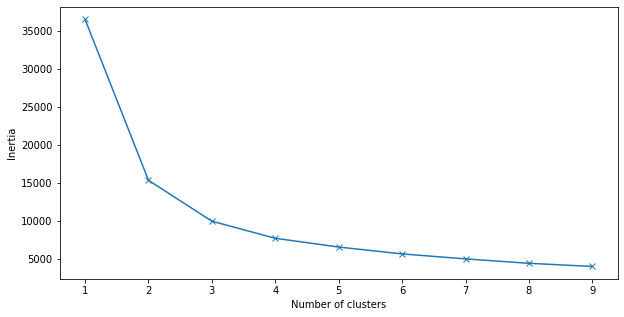

In [0]:
SSE = [] #sum square eror 
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

#convert hasil ke dataframe dan buat plot
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(10,5))
plt.plot(frame['Cluster'], frame['SSE'], marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Berdasarkan hasil elbow method diatas, didapatkan cluster optimal yaitu 2 sampai 5 karena perubahan tertinggi terjadi pada nilai ini. maka akan diambil cluster dengan nilai 2 karena terjadi penurunan drastis pada titik ini.

In [0]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    7991
1    5199
2    5088
Name: cluster, dtype: int64

From Scratch

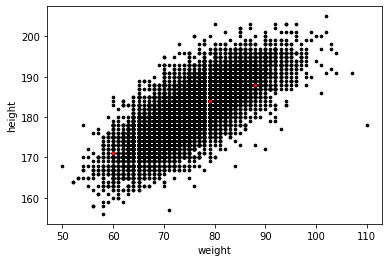

In [0]:
#inisialisasi jumlah kluster. Berdasarkan hasil diatas, klusternya adalah 
K=3
# menentukan random centroid
Centroids = (X.sample(n=K))
plt.scatter(X["weight_kg"],X["height_cm"],c='black', s = 7)
plt.scatter(Centroids["weight_kg"],Centroids["height_cm"],c='red', s= 7)
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

Pada tahap ini dilakukan perhitungan distance untuk menentukan letak centroid baru. Distance dihitung menggunakan Euclidian Distance. Kemudian membuat centroid baru. diff dihitung sebagai perbedaan antara centroid lama dengan centroid baru sehingga apabila perbedaannya 0, iterasi berhenti

In [0]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[] #euclidean distence
        for index2,row_d in XD.iterrows():
            #menghitung distance untuk fitur weight
            d1=(row_c["weight_kg"]-row_d["weight_kg"])**2 
            #menghitung distance untuk fitur height
            d2=(row_c["height_cm"]-row_d["height_cm"])**2
            # menghitung euclidean distance 
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[] #untuk menampung centroid baru 
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        # melakukan iterasi untuk mendapatkan centroid baru
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["height_cm","weight_kg"]] #buat centroid baru
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['height_cm'] - Centroids['height_cm']).sum() + (Centroids_new['weight_kg'] - Centroids['weight_kg']).sum()
        # print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["height_cm","weight_kg"]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Eksperimen**

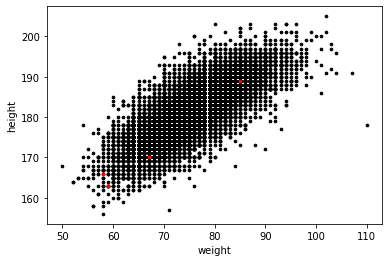

In [0]:
#inisialisasi jumlah kluster. kluster yang digunakan untuk eksperimen yaitu k = 4
Keks=4
# menentukan random centroid
Centroids = (X.sample(n=Keks))
plt.scatter(X["weight_kg"],X["height_cm"],c='black', s = 7)
plt.scatter(Centroids["weight_kg"],Centroids["height_cm"],c='red', s= 7)
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [0]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        EDeks=[] #euclidean distence untuk k = 4
        for index2,row_d in XD.iterrows():
            #menghitung distance untuk fitur weight
            d1=(row_c["weight_kg"]-row_d["weight_kg"])**2 
            #menghitung distance untuk fitur height
            d2=(row_c["height_cm"]-row_d["height_cm"])**2
            # menghitung euclidean distance 
            d=np.sqrt(d1+d2)
            EDeks.append(d)
        X[i]=EDeks
        i=i+1

    C=[] #untuk menampung centroid baru 
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        # melakukan iterasi untuk mendapatkan centroid baru
        for i in range(Keks):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["height_cm","weight_kg"]] #buat centroid baru
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['height_cm'] - Centroids['height_cm']).sum() + (Centroids_new['weight_kg'] - Centroids['weight_kg']).sum()
        # print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["height_cm","weight_kg"]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Hasil Evaluasi**

---
Setelah melakukan beberapa iterasi, didapatkan centroid baru dan telah terbentuk 3 cluster


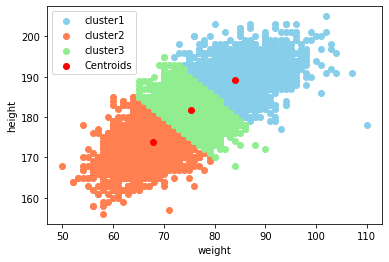

In [0]:
color=['skyblue', 'coral', 'lightgreen']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["weight_kg"],data["height_cm"],c=color[k], label = labels [k])
plt.scatter(Centroids["weight_kg"],Centroids["height_cm"],c='red', label = 'Centroids')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend()
plt.show()

In [0]:
#menghitung sse untuk k = 3, semakin kecil sse nya berarti hasil klusteringnya bagus
sse = min(ED)**2
print (sse)

0.14105299651881592


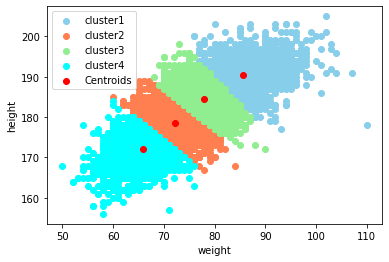

In [0]:
# hasil klustering untuk k = 4
color=['skyblue', 'coral', 'lightgreen','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(Keks):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["weight_kg"],data["height_cm"],c=color[k], label = labels [k])
plt.scatter(Centroids["weight_kg"],Centroids["height_cm"],c='red', label = 'Centroids')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend()
plt.show()

In [0]:
#menghitung sse eksperimen k = 4, semakin kecil sse nya berarti hasil klusteringnya bagus
sse = min(EDeks)**2
print (sse)

0.001305471207190837
